<a href="https://colab.research.google.com/github/AnIsAsPe/Algebra_lineal-para-ML/blob/main/PCA_en_conjunto_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA para un conjunto de imágenes



# Importar bibliotecas

In [ ]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de datos

In [ ]:
datos = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Algebra_lineal-para-ML/main/Datos/sign-language-mnist/sign_mnist_test.csv')
print(datos.shape)
datos.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
muestra = np.random.choice(datos.columns[1:], 10)
datos.loc[:,muestra].describe()

,pixel241,pixel480,pixel322,pixel22,pixel68,pixel8,pixel187,pixel20,pixel26,pixel340
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,150.690463,179.855968,135.335192,172.757808,171.583938,163.649191,152.528305,172.892917,167.807864,175.189626
std,45.934476,41.592106,51.340329,25.966731,32.040103,35.885378,46.764126,26.432681,32.352186,40.567585
min,0.000000,19.000000,0.000000,16.000000,40.000000,0.000000,0.000000,7.000000,0.000000,7.000000
25%,119.000000,158.000000,98.000000,157.000000,152.000000,145.000000,122.000000,157.000000,153.000000,154.000000
50%,153.000000,187.000000,136.000000,172.000000,174.000000,168.000000,158.000000,172.000000,169.000000,182.000000
75%,184.000000,208.000000,173.000000,189.000000,192.000000,187.000000,186.000000,190.000000,187.000000,202.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
y = datos['label'].values
print(y.shape)
y

(7172,)


array([ 6,  5, 10, ...,  2,  4,  2])

In [ ]:
X = datos.iloc[:,1:].values
X.shape

(7172, 784)

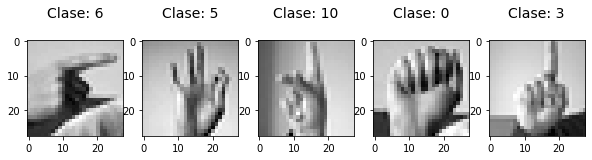

In [ ]:
plt.figure(figsize=(10,2))
for index, (imagen, clase) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(imagen, (28,28)), cmap=plt.cm.gray)
    plt.title('Clase: %i\n' % clase, fontsize = 14)

# Reduccion de dimensionalidad con PCA

In [ ]:
pca = PCA(.95).fit(X)
X_reducida = pca.transform(X)
X_reducida.shape

(7172, 83)

In [ ]:
#reconstruccion o aproximacion
aproximacion = pca.inverse_transform(X_reducida)

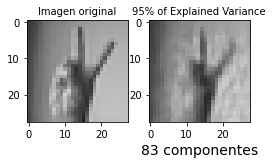

In [ ]:
imagen = 721

plt.figure(figsize=(4,2));

# Imagen original
plt.subplot(1, 2, 1);
plt.imshow(X[imagen].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Imagen original', fontsize = 10);

# 83 componentes principales
plt.subplot(1, 2, 2);
plt.imshow(aproximacion[imagen].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('83 componentes', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 10);